<a href="https://colab.research.google.com/github/DestonSJU/IDS/blob/main/HW4/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. First I import and read the adult_training.csv file. I then use it to create the dataframe trainingDF and display it.

In [1]:
#Initial Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import csv file
from google.colab import files
Upload = files.upload()

Saving adult_training.csv to adult_training.csv


In [3]:
#Creates dataframe using the data
trainingDF = pd.read_csv("adult_training.csv")
trainingDF.head(65)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
60,38,Federal-gov,14,Married-civ-spouse,Prof-specialty,Male,0,0,>50K
61,27,Private,11,Married-civ-spouse,Adm-clerical,Female,0,0,<=50K
62,49,Private,10,Married-civ-spouse,Craft-repair,Male,0,0,>50K
63,61,Self-emp-inc,9,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


2. After creating and plotting the contingency table for work class and sex, I analyzed the results to see if I could draw any conclusions. I found that the majority of the people in this dataset (69.4%) belong to the private work class. Another thing I noticed was that their are more males than females in the dataset. The data is 66.8% male. This can explain why there are more males than females for every different work class.

In [4]:
#Creates and displays contingency table for work class and sex
two_way_table = pd.crosstab(trainingDF.workclass, trainingDF.sex, margins=True)
two_way_table

sex,Female,Male,All
workclass,,,
?,377,452,829
Federal-gov,149,305,454
Local-gov,377,592,969
Never-worked,1,4,5
Private,3574,6707,10281
Self-emp-inc,54,444,498
Self-emp-not-inc,178,992,1170
State-gov,201,385,586
Without-pay,1,4,5


In [5]:
#Creates and displays contingency table of percentages for work class and sex
two_way_table = pd.crosstab(trainingDF.workclass, trainingDF.sex,  normalize='all', margins=True)
two_way_table

sex,Female,Male,All
workclass,,,
?,0.025478,0.030547,0.056025
Federal-gov,0.010070,0.020612,0.030682
Local-gov,0.025478,0.040008,0.065486
Never-worked,0.000068,0.000270,0.000338
Private,0.241535,0.453268,0.694803
Self-emp-inc,0.003649,0.030006,0.033655
Self-emp-not-inc,0.012029,0.067041,0.079070
State-gov,0.013584,0.026019,0.039603
Without-pay,0.000068,0.000270,0.000338


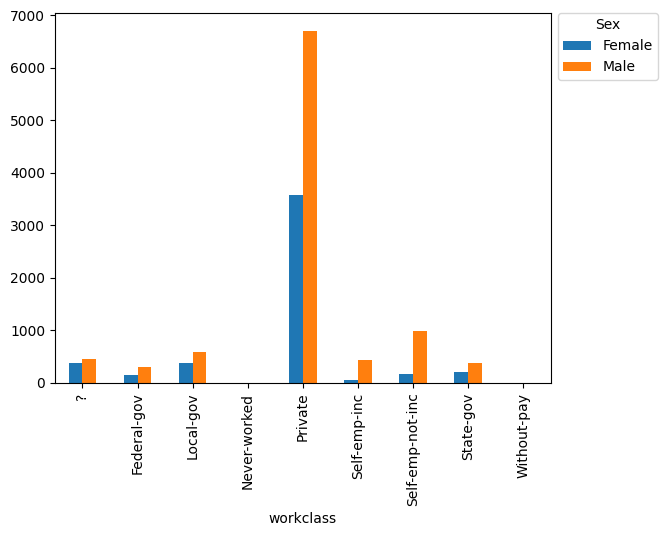

In [6]:
#Plots the contingency table for work class and sex
two_way_table = pd.crosstab(trainingDF.workclass, trainingDF.sex, margins=False)
ax = two_way_table.plot(kind="bar", stacked=False)
ax.legend(title='Sex', bbox_to_anchor=(1, 1.02), loc='upper left')

3. After creating and plotting the contingency table for marital status and sex, I analyzed the results to see if I could draw any conclusions. While theree are still more males than females like the last contingency table there are still conclusion that can be drawn based on sex. While the most common marital status for males was being married to a civilian spouse (60.7% of males), the most common marital status for females was never being married (44% of females).

In [7]:
#Creates and displays contingency table for marital status and sex
two_way_table = pd.crosstab(trainingDF["marital-status"], trainingDF.sex, margins=True)
two_way_table

sex,Female,Male,All
marital-status,,,
Divorced,1219,795,2014
Married-AF-spouse,7,4,11
Married-civ-spouse,761,6010,6771
Married-spouse-absent,95,104,199
Never-married,2160,2717,4877
Separated,290,182,472
Widowed,380,73,453
All,4912,9885,14797


In [8]:
#Creates and displays contingency table of percentages for marital and sex
two_way_table = pd.crosstab(trainingDF["marital-status"], trainingDF.sex,  normalize='all', margins=True)
two_way_table

sex,Female,Male,All
marital-status,,,
Divorced,0.082382,0.053727,0.136109
Married-AF-spouse,0.000473,0.000270,0.000743
Married-civ-spouse,0.051429,0.406163,0.457593
Married-spouse-absent,0.006420,0.007028,0.013449
Never-married,0.145976,0.183618,0.329594
Separated,0.019599,0.012300,0.031898
Widowed,0.025681,0.004933,0.030614
All,0.331959,0.668041,1.000000


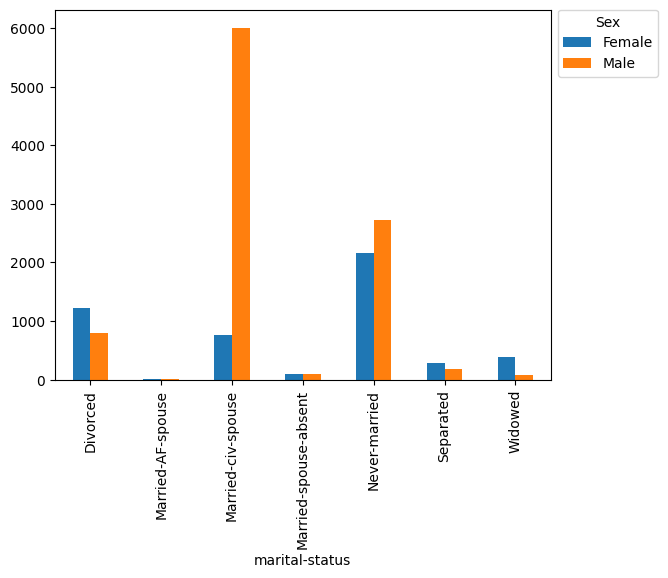

In [9]:
#Plots the contingency table for marital status and sex
two_way_table = pd.crosstab(trainingDF["marital-status"], trainingDF.sex, margins=False)
ax = two_way_table.plot(kind="bar", stacked=False)
ax.legend(title='Sex', bbox_to_anchor=(1, 1.02), loc='upper left')

4. To create a dataframe with adults over the age of 40 I first made a copy of the original dataframe. I then loop through the new dataframe and remove all rows where the age is less than or equal to 40. I finally fix the indexes and display the values of the new dataframe

In [10]:
#Creates a new df (adultOver40) that is a copy of the original (trainingDF)
adultOver40DF = trainingDF.copy(deep = "true")
#Loops through all the rows of the new df and removes the rows with age less than or equal to 40. Displays the new df
for x in range(len(adultOver40DF)):
  if adultOver40DF.loc[x,"age"] <= 40:
    adultOver40DF.drop(x, inplace = True)
#Fixes the indexes
adultOver40DF.reset_index(drop = True, inplace = True)
adultOver40DF.head(100)

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
2,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
3,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
4,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
95,67,Private,11,Divorced,Other-service,Female,0,0,<=50K
96,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
97,41,Private,9,Married-spouse-absent,Craft-repair,Female,0,0,<=50K
98,45,Local-gov,13,Divorced,Prof-specialty,Female,0,0,<=50K


5. After creating and plotting the contingency table for marital status and sex for adults over 40, I analyzed the results to see if I could draw any conclusions. Once again there are more males than females (66.7% males to 33.2 percent females) and for every marital status there are more males than females, which can be explained by there being more males in the dataset overall. The most common marital status for all adults over 40 is married to a civvilian spouse at 60%.

In [11]:
#Creates and displays contingency table for marital status and sex for those over 40 years old
two_way_table = pd.crosstab(adultOver40DF["marital-status"], trainingDF.sex, margins=True)
two_way_table

sex,Female,Male,All
marital-status,,,
Divorced,391,777,1168
Married-civ-spouse,1207,2481,3688
Married-spouse-absent,31,54,85
Never-married,213,358,571
Separated,75,132,207
Widowed,127,298,425
All,2044,4100,6144


In [12]:
#Creates and displays contingency table of percentages for marital status and sex for those over 40 years old
two_way_table = pd.crosstab(adultOver40DF["marital-status"], trainingDF.sex, normalize='all', margins=True)
two_way_table

sex,Female,Male,All
marital-status,,,
Divorced,0.063639,0.126465,0.190104
Married-civ-spouse,0.196452,0.403809,0.600260
Married-spouse-absent,0.005046,0.008789,0.013835
Never-married,0.034668,0.058268,0.092936
Separated,0.012207,0.021484,0.033691
Widowed,0.020671,0.048503,0.069173
All,0.332682,0.667318,1.000000


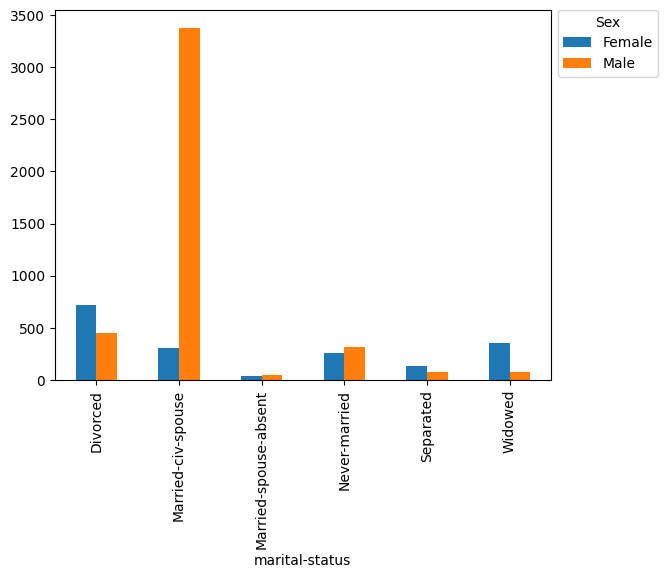

In [13]:
#Plots the contingency table for marital status and sex for thos over 40 years old
two_way_table = pd.crosstab(adultOver40DF["marital-status"], adultOver40DF.sex, margins=False)
ax = two_way_table.plot(kind="bar", stacked=False)
ax.legend(title='Sex', bbox_to_anchor=(1, 1.02), loc='upper left')

6. I looked for outliers for education by taking each education value and seeing if it was greater than the average education value + 3 standard deviations or less than the average education value - 3 standard deviations. I found that there were 113 outliers for education.

In [14]:
#Loops through df and increments count if education is greater than the mean + 3σ or less than the mean - 3σ. Prints count afterwards
count = 0;
for x, education in trainingDF["education"].items():
  if trainingDF.education[x] > np.average(trainingDF.education) + 3*np.std(trainingDF.education):
    count = count + 1
  if trainingDF.education[x] < np.average(trainingDF.education) - 3*np.std(trainingDF.education):
    count = count + 1
print("Amount of Outliers is ",count)

Amount of Outliers is  113


7. First I standardize the age variable by creating a new column scaled age and populating it with the z scores of the different ages. After that I looked to see if there were any outliers. I did this by taking each age value and seeing if it was greater than the average age value + 3 standard deviations or less than the average age value - 3 standard deviations. I found there to be 60 outliers. I then checked for the most extreme outlier, which was 90.

In [15]:
#Creates the scaled age column and populates it with each age's respective z score
from scipy import stats
trainingDF['scaled_age'] = stats.zscore(trainingDF.age, nan_policy='omit')
#Displays df
trainingDF.head(100)


,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,scaled_age
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0.827038
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,-0.050257
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,0.753930
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,0.973254
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,-0.562012
...,...,...,...,...,...,...,...,...,...,...
95,60,Private,9,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,1.558117
96,54,Self-emp-inc,4,Married-civ-spouse,Machine-op-inspct,Male,0,0,>50K,1.119469
97,37,Private,13,Never-married,Exec-managerial,Male,0,0,>50K,-0.123365
98,45,Private,13,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,0.461498


In [16]:
#Loops through df and increments count if education is greater than the mean + 3σ or less than the mean - 3σ. Prints count and most extreme outlier afterwardafterwards
count = 0;
for x, age in trainingDF["age"].items():
  if trainingDF.age[x] > np.average(trainingDF.age) + 3*np.std(trainingDF.age):
    count = count + 1
  if trainingDF.age[x] < np.average(trainingDF.age) - 3*np.std(trainingDF.age):
    count = count + 1
print("Amount of Outliers is ",count)
print("The most extreme outlier is", np.max(trainingDF.age))

Amount of Outliers is  60
The most extreme outlier is 90


8. To create a dataframe with adults age 80 or over, I first made a copy of the original dataframe. I then loop through the new dataframe and remove all rows where the age is less than 80. I then fix the indexes. Finally I create and display the histogram with the ages that are at least 80. I found that out of the ages 80 and above, age 90 is the age that is the most common with about 23 of the ages being 90 years old. 80 is also a common age compared to the other ages outside of 90, with 10 of the ages being 80 years old.

<Axes: >

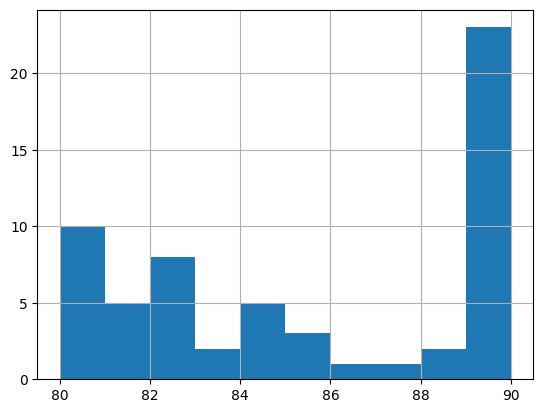

In [17]:
#Creates a new df (adultOver80) that is a copy of the original (trainingDF)
adultOver80DF = trainingDF.copy(deep = "true")
#Loops through all the rows of the new df and removes the rows with age less than or equal to 40.
for x in range(len(adultOver80DF)):
  if adultOver80DF.loc[x,"age"] < 80:
    adultOver80DF.drop(x, inplace = True)
#Fixes the indexes
adultOver80DF.reset_index(drop = True, inplace = True)
#Displays histogram of the adults over 80 df
adultOver80DF.age.hist()

9. Summary: First I upload the csv file and put the data into a dataframe. after that I constructed and plotted a contingency table for work class and sex. Something I noticed in this and the other two contingency tables is that there were significantly more men than women in the dataset. In the workclass and sex contingency table I found that the majority of the people in this dataset (69.4%) belong to the private work class. After making and plotting the marital status and sex contingency table while the most common marital status for males was being married to a civilian spouse (60.7% of males), the most common marital status for females was never being married (44% of females). I then created a dataframe with adults over the age of 40 and created and plotted a contignecy table with marital status and sex for adults over 40 years old. I found that the most common marital status for all adults over 40 is married to a civvilian spouse at 60%. Next I checked for outliers for education and found that there were 113 outliers. I then standardized age using z score and checked for outliers for age. I found there to be 60 outliers and found the most extreme outlier to be 90 years old. Finally I created a dataframe fir adults aged 80 and above so that I could build a histogram with those ages. I found that the most common age 80 and above was 90 years old with about 23 ages being 90.